In [10]:
#Cargar las librerias necesarias

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objs as go 
import plotly.express as px 

# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [12]:
img = mpimg.imread('E:/Escritorio/Analisis_de_Datos/Tarea_4/unad_imagen.png')

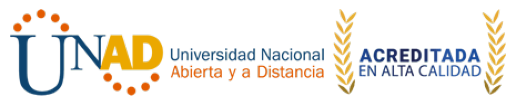

In [14]:
# Muestra la imagen
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()

<div style="text-align: center;">
    <h1> Análisis de Datos </h1>
 <h2> Grupo: 83</h2>
 <h2>Tarea 4 - Algoritmos de Aprendizaje no Supervisado</h2>
 <h2>Presentado por: William David Arias Amaya</h2>
 <h2>Código: 1070970618 </h2>
 <h2>Tutor: Sandra M. Patiño </h2>
 <h2>UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD</h2>
 <h2>Noviembre de 2024</h2>
</div> <br>

# Agrupamiento en Hierarchical Clustering
### Pasos de la Actividad
### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
### 4. Entrenar el modelo configurando los diferentes hiperparámetros
### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
### 7. Interpretar, analizar y documentar los resultados obtenido.s
### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

#### Este dataset contiene conjunto de datos con los conceptos de segmentación de clientes, también conocidos como análisis de la cesta de la compra en su forma más simple, en este taller se utilizara la tecnica de clustering no supervisado que permite agruparlos datos de clientes segun comportamientos, solucionando la incognita de Usted es dueño del centro comercial y desea comprender a los clientes como quiénes pueden converger fácilmente [Clientes objetivo] para poder darle esa idea al equipo de marketing y planificar la estrategia en consecuencia.


In [25]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('E:/Escritorio/Analisis_de_Datos/Tarea_4/Mall_Customers.csv')

In [31]:
# vista de data
data.head(25)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [35]:
# descripcion de datos:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Columnas del dataset CustomerID: Un identificador único para cada cliente. Age: Edad de los clientes. Annual Income (k$): Ingreso anual del cliente en miles de dólares. Spending Score (1-100): Puntuación de gasto, un valor entre 1 y 100 que refleja hábitos de gasto, calculado con base en algún criterio



In [38]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


# Interpretacion de los datos obtenidos:
### Estos datos son el resultado del método DataFrame.info() de pandas, una biblioteca de Python utilizada para el análisis de datos. Este método proporciona un resumen detallado de la estructura del DataFrame. Vamos a desglosar los resultados obtenidos:

### 1. Información básica del DataFrame esto indica que el objeto es un DataFrame de pandas, que es una estructura tabular (como una tabla de base de datos o una hoja de cálculo de Excel). El DataFrame tiene un índice de rango automático (por defecto) que comienza en 0 y termina en 199. Hay 200 entradas en total, lo que significa que el DataFrame tiene 200 filas.

### 2. Información sobre las columnas, hay 5 columnas en el DataFrame. 
### Número de la columna (índice basado en cero).
### Column: Nombre de la columna.
### Non-Null Count: Número de valores no nulos en la columna.
### En este caso, todas las columnas tienen 200 valores no nulos, lo que significa que no hay valores faltantes en ninguna columna.
### Dtype: Tipo de dato de la columna.
### int64: Entero de 64 bits.
### object: Texto o datos categóricos (en este caso, probablemente los géneros como "Male" o "Female").
### Tipos de datos (dtypes): Hay 4 columnas con datos enteros (int64): CustomerID, Age, Annual Income (k$), y Spending Score (1-100), hay 1 columna con datos de texto (object): Gender.

### 3. Uso de memoria: El DataFrame ocupa aproximadamente 7.9 KB en memoria.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

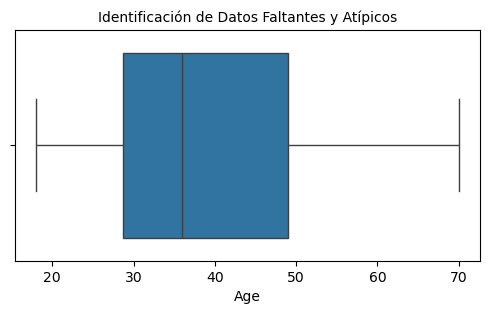

In [43]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
### Identificar datos Faltantes

In [58]:
# Identificar columnas con datos faltantes
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [51]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

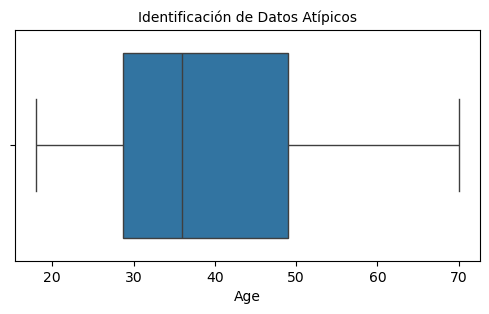

In [60]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [62]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Age']<nivel_minimo)|(data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [53]:
# Filtra Datos Atípicos

Datos=data[(data['Age']<nivel_maximo)&(data['Age']>nivel_minimo)]

In [55]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [79]:
# Filtrar columnas del modelo 

Datos1 = Datos[["CustomerID","Gender","Age"]]

In [81]:
# Revisión de los datos de las variables objetivo
Datos1.head(40)

,CustomerID,Gender,Age
0,1,Male,19
1,2,Male,21
2,3,Female,20
3,4,Female,23
4,5,Female,31
5,6,Female,22
6,7,Female,35
7,8,Female,23
8,9,Male,64
9,10,Female,30


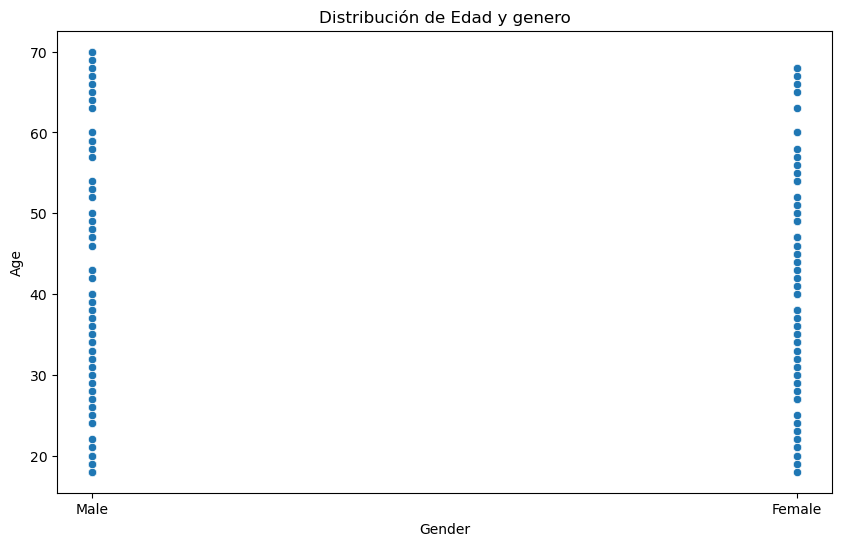

In [85]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Gender'], y=Datos1['Age'])
plt.title('Distribución de Edad y genero')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [111]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform (Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]])

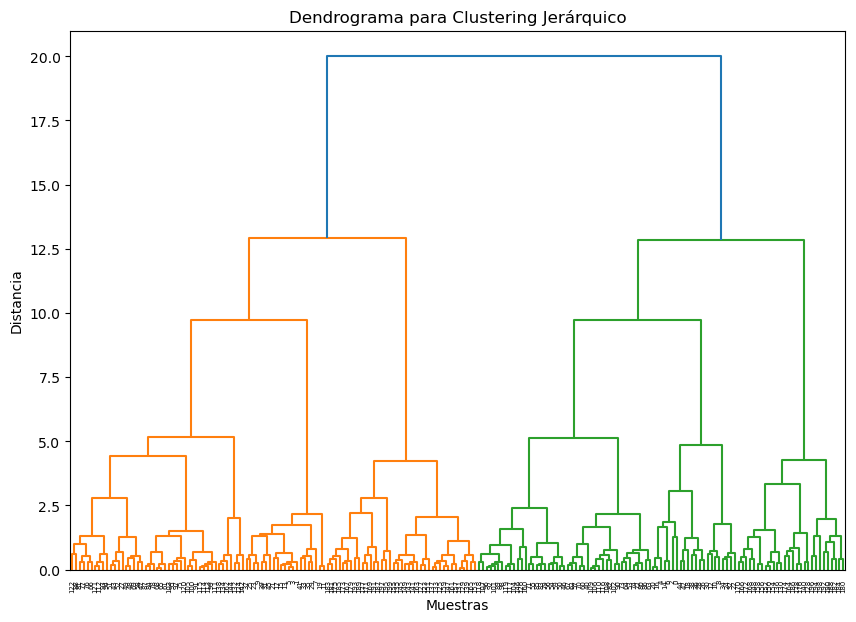

In [168]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

 #### Escalado de los datos: El uso de StandardScaler() implica que los valores de las variables (edad, ingreso anual y puntuación de gasto) están siendo estandarizados, es decir, transformados para tener una media de 0 y una desviación estándar de 1. Esto es importante porque los datos originales pueden tener diferentes escalas (por ejemplo, los ingresos anuales tienen valores mucho mayores que las edades), lo que podría afectar el proceso de clustering. El código np.nan_to_num(scaled_data) se utiliza para manejar cualquier valor no finito (NaN, inf o -inf) en los datos, reemplazándolos por valores finitos (usualmente 0), lo cual previene errores en el proceso de clustering.

 ## Interpretación del dendograma:
 #### Eje horizontal: Representa las diferentes muestras (clientes), es decir, cada punto es una observación. Cuando las muestras se agrupan, se muestran como ramas que se fusionan a lo largo del eje horizontal.
 #### Eje vertical: Representa la distancia o disimilitud entre las observaciones que se agrupan. Cuanto mayor sea la distancia en el eje vertical entre dos grupos, significa que son más diferentes entre sí. En contraste, si la distancia es pequeña, significa que esos dos grupos son similares.
 #### Las ramas más cortas indican que los grupos son similares entre sí, mientras que las ramas largas indican una gran diferencia.
 #### Las ramas que se fusionan a un nivel bajo indican que los clientes en esos grupos son muy similares entre sí en cuanto a las variables de edad, ingresos y puntuación de gasto.
 ## Grupos de clientes:
 #### Grupo de clientes jóvenes con ingresos bajos: Podría ser un grupo que se agrupe en un nivel más bajo (indicado por ramas cortas).
#### Grupo de clientes mayores con ingresos altos: Podría ser otro grupo que se agrupe más arriba, ya que es menos similar a los otros en términos de sus características.

#

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [180]:

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
# Realiza el enlace jerárquico
linked = linkage(scaled_data, method='ward')

# Seleccionar el número de clusters que deseas (por ejemplo, 4)
num_clusters = 4

# Asignar las etiquetas de los clusters
cluster_labels = fcluster(linked, t=num_clusters, criterion='maxclust')

# Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Coeficiente de Silhouette: {silhouette_avg:.3f}")

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.3f}")

Coeficiente de Silhouette: 0.361
Índice de Calinski-Harabasz: 102.019


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

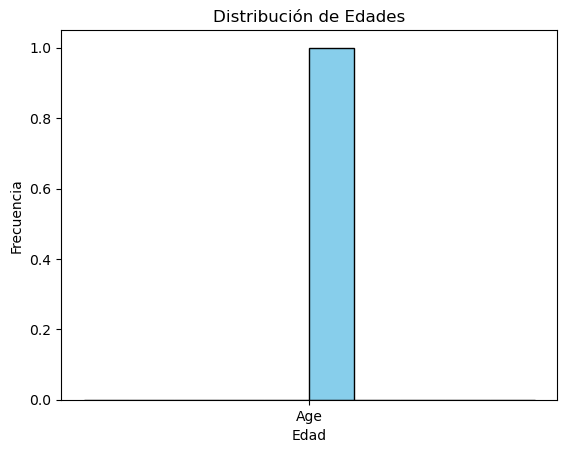

In [137]:
# Histograma de edades
plt.hist(['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

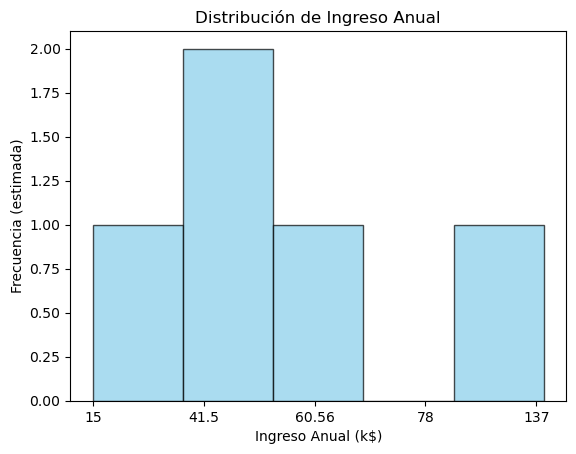

In [147]:
# Datos del histograma
annual_income = [15, 41.5, 60.56, 78, 137]  # min, Q1, mean, Q3, max
labels = ['15', '41.5', '60.56', '78', '137']

plt.hist(annual_income, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia (estimada)')
plt.xticks(ticks=np.arange(15, 138, 30), labels=labels)
plt.show()

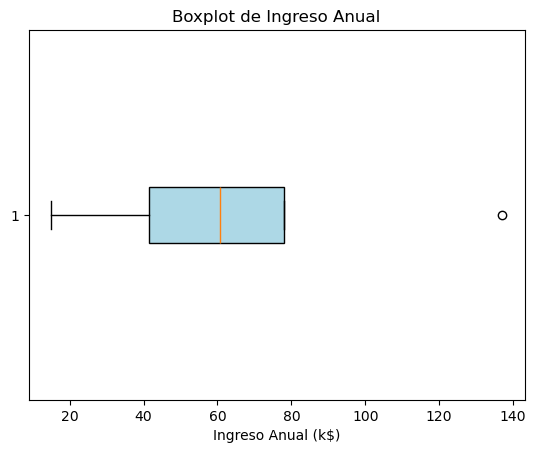

In [149]:
# Boxplot del ingreso anual
data_income = [15, 41.5, 60.56, 78, 137]  # min, Q1, mean (como punto), Q3, max
plt.boxplot(data_income, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Boxplot de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.show()

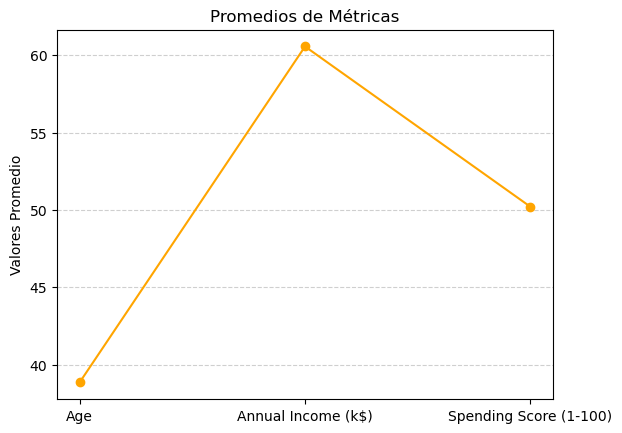

In [151]:
# Datos
metrics = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
means = [38.85, 60.56, 50.2]

plt.plot(metrics, means, marker='o', color='orange')
plt.title('Promedios de Métricas')
plt.ylabel('Valores Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

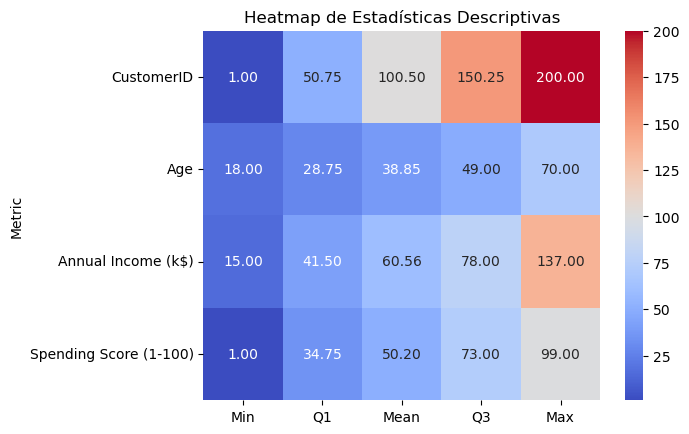

In [161]:
import seaborn as sns
import pandas as pd

# Crear un DataFrame basado en las estadísticas descriptivas
stats_data = {
    'Metric': ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    'Min': [1, 18, 15, 1],
    'Q1': [50.75, 28.75, 41.5, 34.75],
    'Mean': [100.5, 38.85, 60.56, 50.2],
    'Q3': [150.25, 49, 78, 73],
    'Max': [200, 70, 137, 99],
}

df_stats = pd.DataFrame(stats_data)

# Heatmap
sns.heatmap(df_stats.iloc[:, 1:].set_index(df_stats['Metric']), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap de Estadísticas Descriptivas')
plt.show()

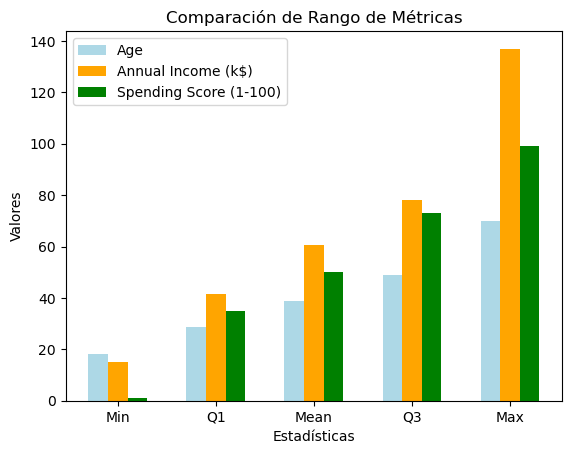

In [163]:
# Datos para gráfico de barras
categories = ['Min', 'Q1', 'Mean', 'Q3', 'Max']
ages = [18, 28.75, 38.85, 49, 70]
income = [15, 41.5, 60.56, 78, 137]
score = [1, 34.75, 50.2, 73, 99]

x = np.arange(len(categories))

# Gráficos
plt.bar(x - 0.2, ages, width=0.2, label='Age', color='lightblue')
plt.bar(x, income, width=0.2, label='Annual Income (k$)', color='orange')
plt.bar(x + 0.2, score, width=0.2, label='Spending Score (1-100)', color='green')

plt.title('Comparación de Rango de Métricas')
plt.xlabel('Estadísticas')
plt.ylabel('Valores')
plt.xticks(x, categories)
plt.legend()
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos.

### Diversidad Demográfica: Los datos muestran una base de clientes diversa en términos de edad, ingresos y comportamiento de gasto, lo que puede ser un indicio de que la empresa tiene un mercado amplio que abarca diferentes segmentos.

### Oportunidades de Personalización: Con esta información, la empresa puede crear estrategias de marketing más personalizadas, adaptadas a las necesidades y comportamientos de diferentes grupos de clientes.

### Optimización de Productos y Precios: La segmentación también puede ayudar a la empresa a ajustar su oferta de productos y precios para cada segmento de clientes, maximizando así la satisfacción del cliente y los ingresos de la empresa.